# Análisis exploratorio de los datos

A continuación, se va a realizar un análisis de los datos, para detectar outliers, patrones, y resultados interesantes que aporten conocimiento.

### Librerías

In [3]:
import numpy as np
import pandas as pd
import csv
import string
import re
import seaborn as sns
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from textblob import TextBlob

## ```steam_games```

In [7]:
# Cargo los CSV

df_steam_games = pd.read_csv('/Users/mlucchesi/Henry/PI/data/csv/procesados/steam_games_procesado.csv')
df_steam_games.head(1)

,Unnamed: 0,publisher,genres,app_name,title,url,release_date,tags,reviews_url,specs,price,early_access,id,developer
0,88310,Kotoshiro,"['Action', 'Casual', 'Indie', 'Simulation', 'S...",Lost Summoner Kitty,Lost Summoner Kitty,http://store.steampowered.com/app/761140/Lost_...,2018-01-04,"['Strategy', 'Action', 'Indie', 'Casual', 'Sim...",http://steamcommunity.com/app/761140/reviews/?...,['Single-player'],4.99,0.0,761140.0,Kotoshiro


### Nulos

In [ ]:
# Dropeo la columna Unnamed: 0

df_steam_games = df_steam_games.drop(columns=['Unnamed: 0'])

In [12]:
nulos_steam_games = df_steam_games.isnull().mean() * 100
nulos_steam_games

publisher       25.328477
genres          10.192533
app_name         0.003252
title            6.286588
url              0.000000
release_date     6.299597
tags             0.426044
reviews_url      0.006504
specs            2.126968
price            0.000000
early_access     0.000000
id               0.006504
developer       10.260830
dtype: float64

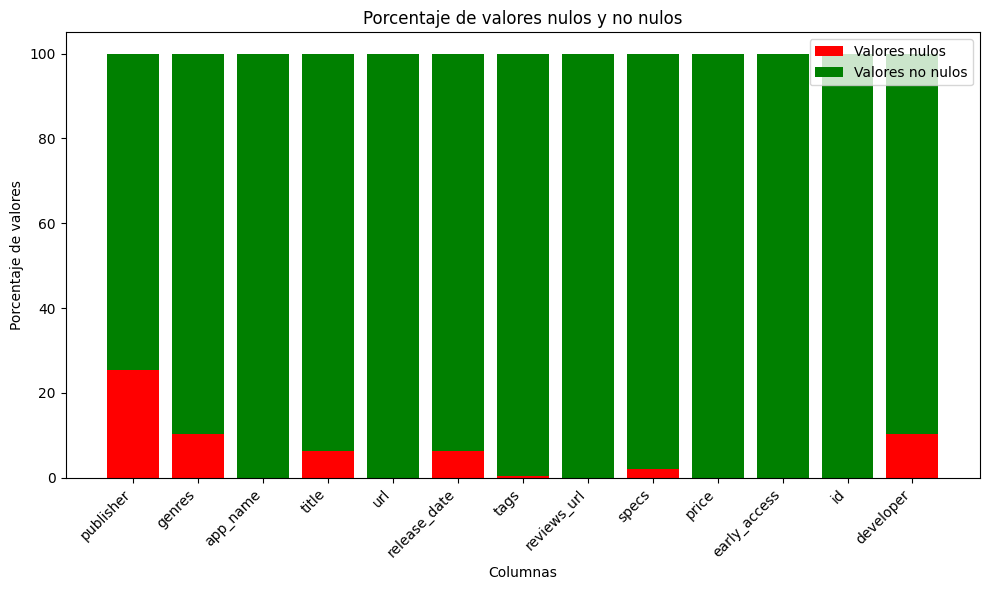

In [17]:
# Grafico el porcentaje de nulos por cada columna:

nulos = nulos_steam_games
no_nulos = 100 - nulos_steam_games

plt.figure(figsize=(10, 6))

plt.bar(nulos.index, nulos, color='red', label='Valores nulos')
plt.bar(no_nulos.index, no_nulos, bottom=nulos, color='green', label='Valores no nulos')

plt.title('Porcentaje de valores nulos y no nulos')
plt.xlabel('Columnas')
plt.ylabel('Porcentaje de valores')

plt.xticks(rotation=45, ha='right')

plt.legend()

plt.tight_layout()
plt.show()

### Nube de palabras

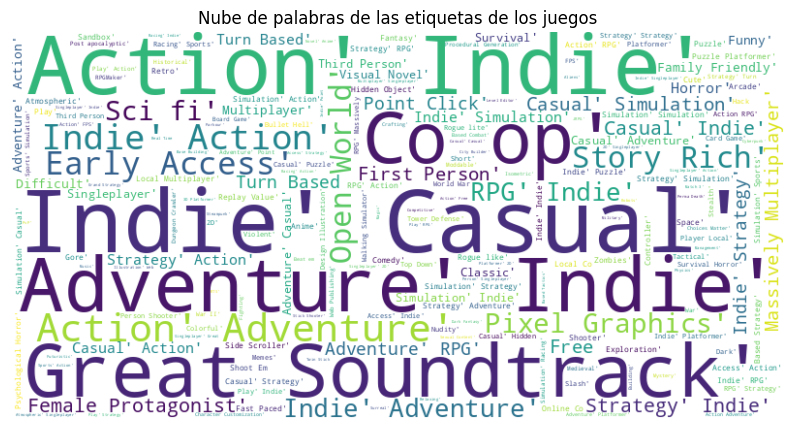

In [26]:
# Concatenar todas las palabras de la columna 'tags' en una sola cadena
text = ' '.join(df_steam_games['tags'])

# Crear el objeto WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Mostrar la nube de palabras
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Nube de palabras de las etiquetas de los juegos')
plt.axis('off')
plt.show()

## ```user_reviews```

In [42]:
# Cargo el CSV

df_user_reviews = pd.read_csv('/Users/mlucchesi/Henry/PI/data/csv/procesados/user_reviews_procesado_nlp.csv')
df_user_reviews.head(1)

,Unnamed: 0,user_id,user_url,posted,item_id,helpful,recommend,sentiment_analysis
0,0,76561197970982479,http://steamcommunity.com/profiles/76561197970...,"Posted November 5, 2011.",1250,No ratings yet,True,2


In [32]:
# Dropeo la columna Unnamed: 0

df_user_reviews = df_user_reviews.drop(columns=['Unnamed: 0'])

In [33]:
df_user_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55832 entries, 0 to 55831
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   user_id             25771 non-null  object
 1   user_url            25771 non-null  object
 2   posted              55832 non-null  object
 3   item_id             55832 non-null  int64 
 4   helpful             55832 non-null  object
 5   recommend           55832 non-null  bool  
 6   sentiment_analysis  55832 non-null  int64 
dtypes: bool(1), int64(2), object(4)
memory usage: 2.6+ MB


In [34]:
df_user_reviews.head()

,user_id,user_url,posted,item_id,helpful,recommend,sentiment_analysis
0,76561197970982479,http://steamcommunity.com/profiles/76561197970...,"Posted November 5, 2011.",1250,No ratings yet,True,2
1,js41637,http://steamcommunity.com/id/js41637,"Posted June 24, 2014.",251610,15 of 20 people (75%) found this review helpful,True,2
2,evcentric,http://steamcommunity.com/id/evcentric,Posted February 3.,248820,No ratings yet,True,2
3,doctr,http://steamcommunity.com/id/doctr,"Posted October 14, 2013.",250320,2 of 2 people (100%) found this review helpful,True,2
4,maplemage,http://steamcommunity.com/id/maplemage,"Posted April 15, 2014.",211420,35 of 43 people (81%) found this review helpful,True,1


### Distribución de las reviews de los juegos

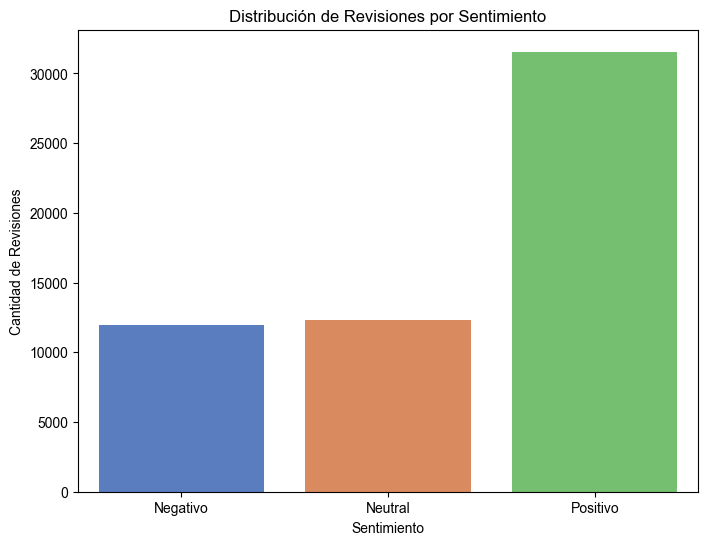

In [38]:
# Contar la cantidad de reviews por categoría de sentimiento
revisiones_por_sentimiento = df_user_reviews['sentiment_analysis'].value_counts()

# Crear el gráfico de barras
plt.figure(figsize=(8, 6))
sns.barplot(x=revisiones_por_sentimiento.index, y=revisiones_por_sentimiento.values, palette='muted')

# Personalizar el gráfico
plt.title('Distribución de Revisiones por Sentimiento')
plt.xlabel('Sentimiento')
plt.ylabel('Cantidad de Revisiones')
plt.xticks(ticks=[0, 1, 2], labels=['Negativo', 'Neutral', 'Positivo'])

# Mostrar el gráfico
plt.show()


### Nulos

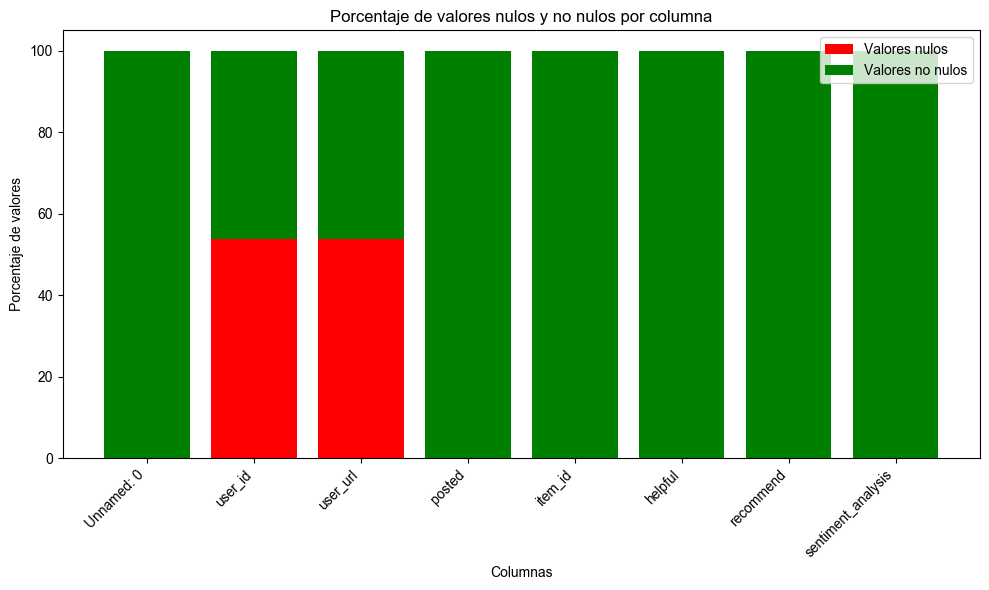

In [44]:
# Calcular el porcentaje de valores nulos y no nulos por columna
total_registros = len(df_user_reviews)
valores_nulos = df_user_reviews.isnull().sum()
porcentaje_nulos = (valores_nulos / total_registros) * 100
porcentaje_no_nulos = 100 - porcentaje_nulos

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))

plt.bar(porcentaje_nulos.index, porcentaje_nulos, color='red', label='Valores nulos')
plt.bar(porcentaje_no_nulos.index, porcentaje_no_nulos, bottom=porcentaje_nulos, color='green', label='Valores no nulos')

plt.title('Porcentaje de valores nulos y no nulos por columna')
plt.xlabel('Columnas')
plt.ylabel('Porcentaje de valores')
plt.xticks(rotation=45, ha='right')
plt.legend()

plt.tight_layout()
plt.show()

## ```user_items```

In [46]:
# Cargo el parquet (ya que es mas liviano)

df_user_items = pd.read_parquet('/Users/mlucchesi/Henry/PI/data/parquet/users_items_procesado.parquet')
df_user_items.head(1)

,user_id,items_count,steam_id,user_url,item_id,item_name,playtime_forever,playtime_2weeks
0,76561197970982479,277.0,76561197970982479,http://steamcommunity.com/profiles/76561197970...,10,Counter-Strike,6,0


In [47]:
df_user_items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5153209 entries, 0 to 5153208
Data columns (total 8 columns):
 #   Column            Dtype 
---  ------            ----- 
 0   user_id           object
 1   items_count       object
 2   steam_id          object
 3   user_url          object
 4   item_id           int64 
 5   item_name         object
 6   playtime_forever  int64 
 7   playtime_2weeks   int64 
dtypes: int64(3), object(5)
memory usage: 314.5+ MB


### Nulos

In [48]:
nulos_items = df_user_items.isnull().mean() * 100
nulos_items

user_id             98.286311
items_count         98.286311
steam_id            98.286311
user_url            98.286311
item_id              0.000000
item_name            0.000000
playtime_forever     0.000000
playtime_2weeks      0.000000
dtype: float64

In [50]:
# El porcentaje de valores nulos en ciertas columnas, es altísimo

# Se eliminan para hacer un mejor análisis

# Eliminar filas con valores nulos
df_user_items_clean = df_user_items.dropna()

# Verificar el nuevo porcentaje de nulos
nulos_items_clean = df_user_items_clean.isnull().mean() * 100
nulos_items_clean


user_id             0.0
items_count         0.0
steam_id            0.0
user_url            0.0
item_id             0.0
item_name           0.0
playtime_forever    0.0
playtime_2weeks     0.0
dtype: float64

### Los más jugados

In [55]:
# Ordenar el DataFrame por tiempo jugado en orden descendente y seleccionar los primeros 10 juegos
top_10_juegos_mas_jugados = df_user_items.sort_values(by='playtime_forever', ascending=False).head(10)

# Imprimir los encabezados
print("{:<40} {:<30}".format('Juego', 'Tiempo Jugado (en minutos)'))

# Iterar sobre los 10 juegos más jugados e imprimir los nombres y tiempos jugados
for index, row in top_10_juegos_mas_jugados.iterrows():
    print("{:<40} {:<30}".format(row['item_name'], row['playtime_forever']))

Juego                                    Tiempo Jugado (en minutos)    
Garry's Mod                              642773                        
Mabinogi                                 635295                        
Call of Duty: Black Ops - Multiplayer    632452                        
Garry's Mod                              613411                        
Universe Sandbox                         600068                        
Garry's Mod                              551719                        
EVE Online                               530882                        
Garry's Mod                              501498                        
Garry's Mod                              495058                        
Half-Life 2: Deathmatch                  493791                        


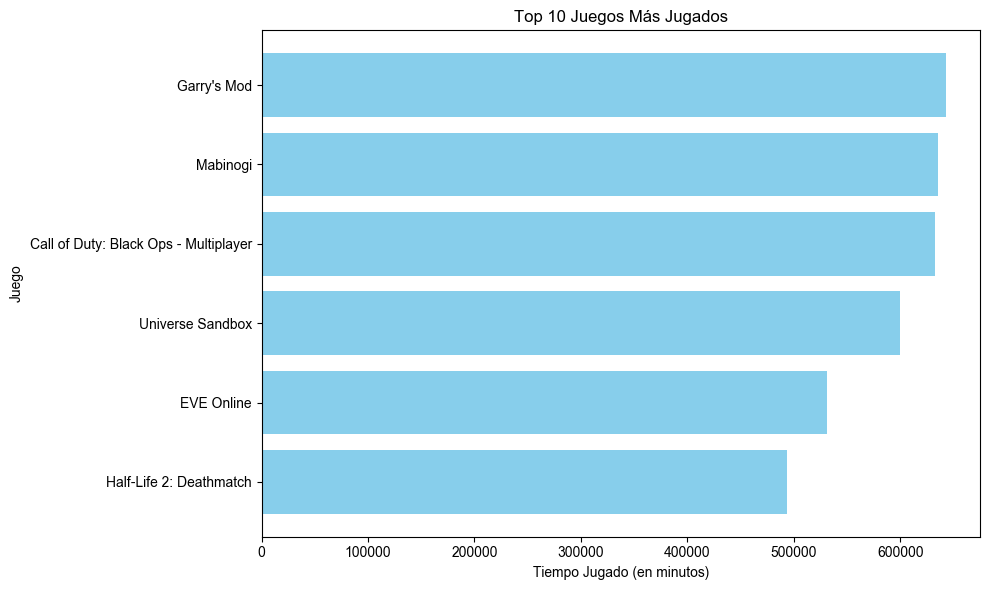

In [54]:
# Ordenar el DataFrame por tiempo jugado en orden descendente y seleccionar los primeros 10 juegos
top_10_juegos_mas_jugados = df_user_items.sort_values(by='playtime_forever', ascending=False).head(10)

# Configurar el tamaño del gráfico
plt.figure(figsize=(10, 6))

# Crear el gráfico de barras horizontales
plt.barh(top_10_juegos_mas_jugados['item_name'], top_10_juegos_mas_jugados['playtime_forever'], color='skyblue')

# Agregar etiquetas y título
plt.xlabel('Tiempo Jugado (en minutos)')
plt.ylabel('Juego')
plt.title('Top 10 Juegos Más Jugados')

# Mostrar el gráfico
plt.gca().invert_yaxis()
plt.tight_layout()  
plt.show()
